In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 
import matplotlib.pyplot as plt
import matplotlib.image as mping
from matplotlib.pyplot import imread

In [79]:
!dir "C://Users//aloky//OneDrive//Desktop//Cosmos//Backend//Dataset"

 Volume in drive C has no label.
 Volume Serial Number is D425-5859

 Directory of C:\Users\aloky\OneDrive\Desktop\Cosmos\Backend\Dataset

21-12-2023  16:03    <DIR>          .
21-12-2023  16:03    <DIR>          ..
21-12-2023  19:56    <DIR>          Akne
21-12-2023  19:56    <DIR>          Benign
21-12-2023  19:56    <DIR>          Ekzama
21-12-2023  19:56    <DIR>          Enfeksiyonel
21-12-2023  19:57    <DIR>          Malign
21-12-2023  14:30    <DIR>          Pigment
               0 File(s)              0 bytes
               8 Dir(s)  33,019,576,320 bytes free


C:\Users\aloky\AppData\Local\Temp\ipykernel_856\3060878133.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\aloky\AppData\Local\Temp\ipykernel_856\3060878133.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i)


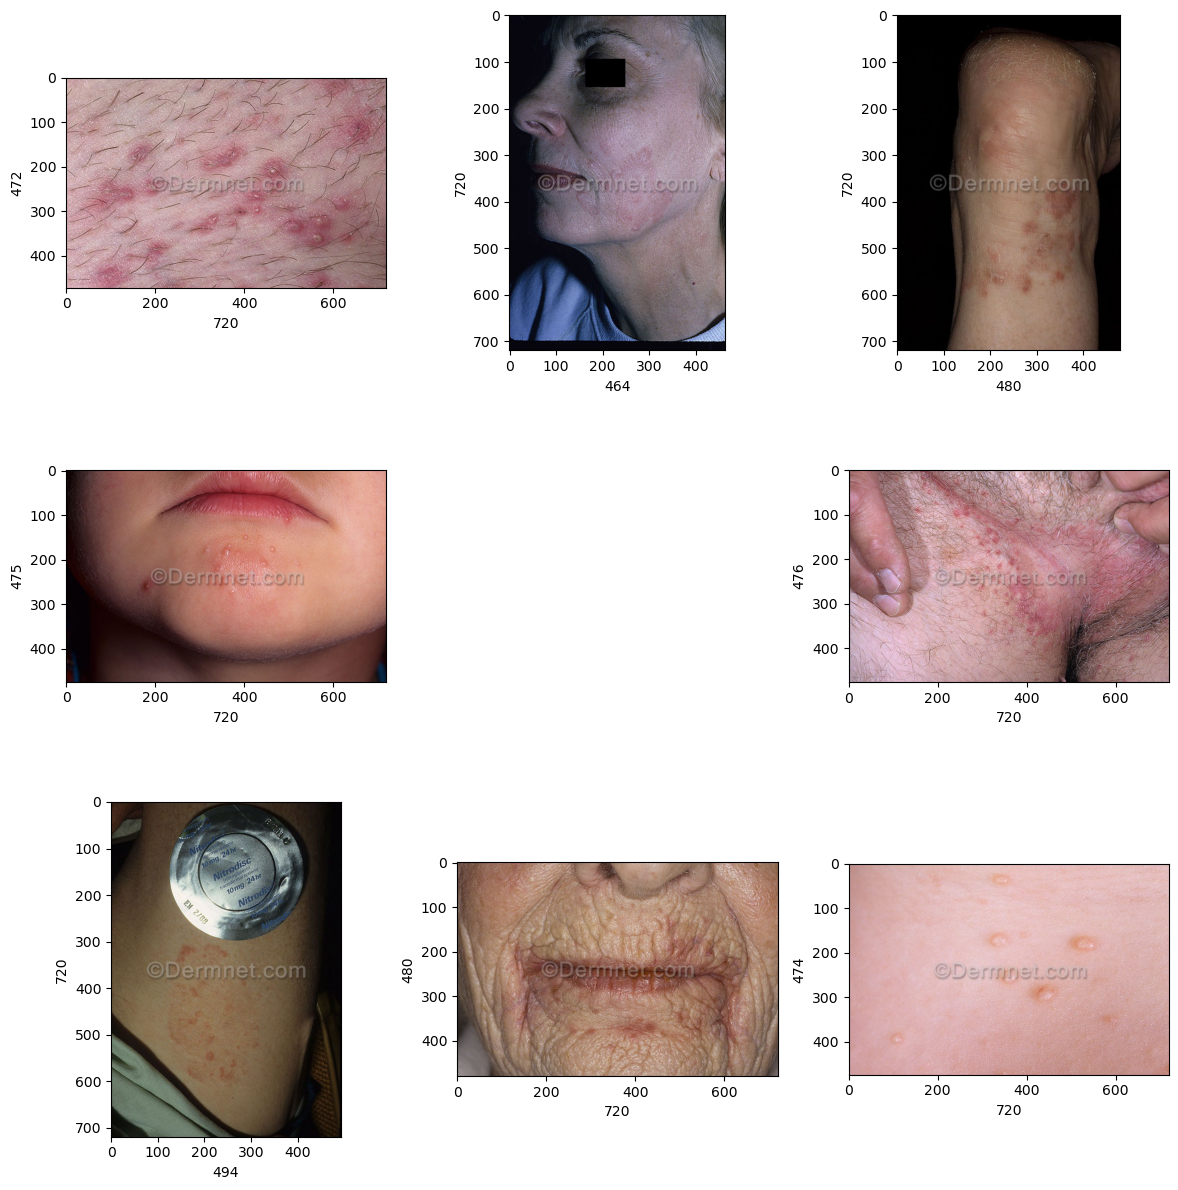

In [80]:
plt.figure(figsize=(12,12))
path = "C://Users//aloky//OneDrive//Desktop//Cosmos//Backend//Dataset//Enfeksiyonel"
for i in range(1, 3*3+1) :
    plt.subplot(3, 3, i)
    plt.tight_layout()
    random_img = imread(path + '/' + random.choice(sorted(os.listdir(path))))
    plt.imshow(random_img)
    plt.xlabel(random_img.shape[1], fontsize =10)
    plt.ylabel(random_img.shape[0], fontsize =10)

In [81]:
def convert_image_to_array(image_dir) :
    try:
        image = cv2.imread(image_dir)
        if image is not None:
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None
    
# convert_image_to_array("C://Users//aloky//OneDrive//Desktop//Cosmos//Backend//Dataset//Enfeksiyonel/t-herpes-type-1-recurrent-48.jpg")

In [82]:
dir = "C://Users//aloky//OneDrive//Desktop//Cosmos//Backend//Dataset"
image_list, label_list = [], []
all_labels = ['Enfeksiyonel', 'Ekzama', 'Akne', 'Pigment', 'Benign', 'Malign']
binary_labels = [0,1,2,3,4,5]
temp = -1

for directory in ['Enfeksiyonel', 'Ekzama', 'Akne', 'Pigment', 'Benign', 'Malign']:
    disease_image_list = listdir(f"{dir}/{directory}")
    temp += 1
    for files in disease_image_list:
        image_path = f"{dir}/{directory}/{files}"
        image_list.append(convert_image_to_array(image_path))
        label_list.append(binary_labels[temp])

In [45]:
dir = "C://Users//aloky//OneDrive//Desktop//Cosmos//Backend//Dataset"
disease_image_list = listdir(f"{dir}/Pigment")
print(len(disease_image_list))

136


In [46]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

0    150
1    150
2    150
4    150
5    150
3    136
Name: count, dtype: int64

In [47]:
image_list[0].shape

(256, 256, 3)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = .2, random_state=42)

In [49]:
x_test[0].dtype

dtype('float32')

In [50]:
indices_non_empty_train = [i for i, element in enumerate(x_train) if np.array(element).shape != (0,) and np.array(element).shape != ()]
x_train_filtered = [x_train[i] for i in indices_non_empty_train]
y_train_filtered = [y_train[i] for i in indices_non_empty_train]
indices_non_empty_test = [i for i, element in enumerate(x_test) if np.array(element).shape != (0,) and np.array(element).shape != ()]
x_test_filtered = [x_test[i] for i in indices_non_empty_test]
y_test_filtered = [y_test[i] for i in indices_non_empty_test]

In [51]:
print(len(x_train_filtered), len(y_train_filtered))
print(len(x_test_filtered), len(y_test_filtered))

708 708
178 178


In [52]:
import numpy as np
x_train_np = np.array(x_train_filtered, dtype=np.float32)/255.0
x_test_np = np.array(x_test_filtered , dtype=np.float32)/255.0
x_train = x_train_np.reshape(-1, 256, 256, 3)
x_test = x_test_np.reshape(-1, 256, 256, 3)

In [53]:
print(len(x_train), len(y_train_filtered))
print(len(x_test), len(y_test_filtered))

708 708
178 178


In [54]:
x_test[0].shape

(256, 256, 3)

In [55]:
y_train = to_categorical(y_train_filtered)
y_test = to_categorical(y_test_filtered)

In [56]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

708 708
178 178


In [72]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = (3,3)))
model.add(Conv2D(16, (3,3), padding = "same", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(8, activation="relu"))
model.add(Dense(6, activation="softmax"))

In [73]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 85, 85, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 85, 85, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 16)        4624      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 16)       

In [74]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(0.0001), metrics=['accuracy'])

In [75]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

452 452
178 178


In [76]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [77]:
print(len(x_val), len(y_val))

91 91


In [71]:
history = model.fit(x_train, y_train, batch_size=32, epochs = 100, validation_data = (x_val, y_val))

Epoch 1/100
15/15 [==============================] - 20s 1s/step - loss: 1.7835 - accuracy: 0.1836 - val_loss: 1.7508 - val_accuracy: 0.2105
Epoch 2/100
15/15 [==============================] - 17s 1s/step - loss: 1.7702 - accuracy: 0.1969 - val_loss: 1.7444 - val_accuracy: 0.2105
Epoch 3/100
15/15 [==============================] - 16s 1s/step - loss: 1.7602 - accuracy: 0.2058 - val_loss: 1.7365 - val_accuracy: 0.2456
Epoch 4/100
15/15 [==============================] - 15s 983ms/step - loss: 1.7529 - accuracy: 0.2146 - val_loss: 1.7160 - val_accuracy: 0.2281
Epoch 5/100
15/15 [==============================] - 14s 964ms/step - loss: 1.7398 - accuracy: 0.2235 - val_loss: 1.7048 - val_accuracy: 0.2719
Epoch 6/100
15/15 [==============================] - 15s 983ms/step - loss: 1.7263 - accuracy: 0.2235 - val_loss: 1.6830 - val_accuracy: 0.2719
Epoch 7/100
15/15 [==============================] - 17s 1s/step - loss: 1.7155 - accuracy: 0.2279 - val_loss: 1.6813 - val_accuracy: 0.2544
Epoc

KeyboardInterrupt: 